In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, TensorBoard
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
train_data = np.load('training_data.npy')
train_label = np.load('training_label.npy')

# val_data = train_data[:1000]
# val_y 
train_data.shape

(60000, 28, 28, 1)

In [3]:
train_y = to_categorical(train_label, num_classes=10)
# train_label
train_y.shape

(60000, 10)

W0721 13:05:34.101084 140593768408896 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 13:05:34.130667 140593768408896 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 13:05:34.134397 140593768408896 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 13:05:34.161426 140593768408896 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 13:05:34.226300 140593768408896 d

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 57s 1ms/step - loss: 0.8746 - acc: 0.6818 - val_loss: 0.4560 - val_acc: 0.8315
Epoch 2/20
54000/54000 [==============================] - 65s 1ms/step - loss: 0.5774 - acc: 0.7930 - val_loss: 0.3995 - val_acc: 0.8533
Epoch 3/20
54000/54000 [==============================] - 62s 1ms/step - loss: 0.4982 - acc: 0.8250 - val_loss: 0.3463 - val_acc: 0.8735
Epoch 4/20
54000/54000 [==============================] - 57s 1ms/step - loss: 0.4608 - acc: 0.8421 - val_loss: 0.3189 - val_acc: 0.8885
Epoch 5/20
54000/54000 [==============================] - 59s 1ms/step - loss: 0.4314 - acc: 0.8511 - val_loss: 0.3112 - val_acc: 0.8912
Epoch 6/20
54000/54000 [==============================] - 47s 878us/step - loss: 0.4089 - acc: 0.8619 - val_loss: 0.2974 - val_acc: 0.8943
Epoch 7/20
54000/54000 [==============================] - 51s 943us/step - loss: 0.3832 - acc: 0.8677 - val_loss: 0.3033 - val_

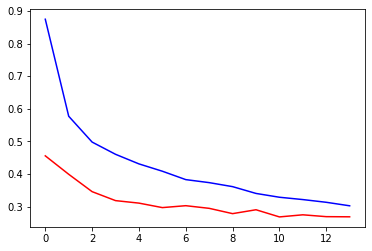

In [4]:
# model--1
model = Sequential()

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience=3)  
# tensorboard = TensorBoard(log_dir='logs/')
history = model.fit(train_data, train_y, validation_split=0.1, epochs=20, callbacks = [early_stopping_monitor])

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.show()

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 48s 893us/step - loss: 0.6589 - acc: 0.7634 - val_loss: 0.3897 - val_acc: 0.8538
Epoch 2/20
54000/54000 [==============================] - 45s 834us/step - loss: 0.4480 - acc: 0.8391 - val_loss: 0.3268 - val_acc: 0.8752
Epoch 3/20
54000/54000 [==============================] - 49s 913us/step - loss: 0.3849 - acc: 0.8633 - val_loss: 0.2949 - val_acc: 0.8868
Epoch 4/20
54000/54000 [==============================] - 51s 948us/step - loss: 0.3517 - acc: 0.8718 - val_loss: 0.2809 - val_acc: 0.8975
Epoch 5/20
54000/54000 [==============================] - 51s 937us/step - loss: 0.3296 - acc: 0.8819 - val_loss: 0.2749 - val_acc: 0.8973
Epoch 6/20
54000/54000 [==============================] - 53s 972us/step - loss: 0.3078 - acc: 0.8882 - val_loss: 0.2568 - val_acc: 0.9038
Epoch 7/20
54000/54000 [==============================] - 53s 974us/step - loss: 0.2894 - acc: 0.8950 - val_loss: 0.2

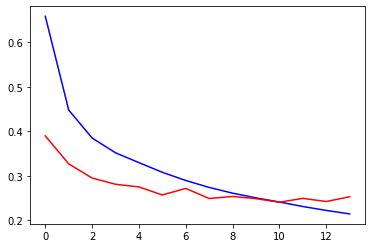

In [5]:
# Changing the network's structure to try and increase accuracy
# model--2
model2 = Sequential()

model2.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(80, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience=3)  

history2 = model2.fit(train_data, train_y, validation_split=0.1, epochs=20, callbacks = [early_stopping_monitor])

history_dict2 = history2.history

loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.show()


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 51s 937us/step - loss: 0.6071 - acc: 0.7795 - val_loss: 0.3694 - val_acc: 0.8602
Epoch 2/20
54000/54000 [==============================] - 51s 939us/step - loss: 0.4146 - acc: 0.8530 - val_loss: 0.3305 - val_acc: 0.8793
Epoch 3/20
54000/54000 [==============================] - 44s 816us/step - loss: 0.3580 - acc: 0.8696 - val_loss: 0.2849 - val_acc: 0.8932
Epoch 4/20
54000/54000 [==============================] - 43s 799us/step - loss: 0.3275 - acc: 0.8819 - val_loss: 0.2857 - val_acc: 0.8930
Epoch 5/20
54000/54000 [==============================] - 43s 798us/step - loss: 0.3031 - acc: 0.8913 - val_loss: 0.2602 - val_acc: 0.9042
Epoch 6/20
54000/54000 [==============================] - 51s 946us/step - loss: 0.2823 - acc: 0.8987 - val_loss: 0.2495 - val_acc: 0.9075
Epoch 7/20
54000/54000 [==============================] - 46s 853us/step - loss: 0.2671 - acc: 0.9028 - val_loss: 0.2

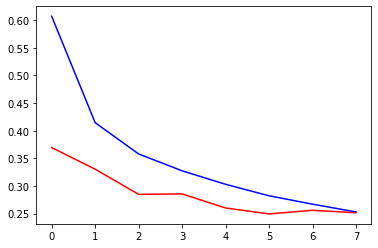

In [6]:
# model--3
model3 = Sequential()

model3.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(80, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping_monitor = EarlyStopping(monitor='val_loss',patience=2)  

history3 = model3.fit(train_data, train_y, validation_split=0.1, epochs=20, callbacks = [early_stopping_monitor])

history_dict3 = history3.history

loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.show()


In [7]:
# Judging from the plots, the val_loss values and the accuracies,
# model3 is assumed to be better, using model2 to predict as a result of this.
test_data = np.load('testing_data.npy')
model3.save_weights('assg_2_model_AI0086.h5') # saving the trained model

In [8]:
pred = model3.predict(test_data)
pred

array([[1.69541539e-14, 1.77463597e-18, 2.92128660e-17, ...,
        3.77371475e-06, 3.27498750e-14, 9.99996066e-01],
       [1.31412946e-07, 7.29090293e-17, 9.99998927e-01, ...,
        3.84453606e-28, 3.13433768e-13, 2.54927438e-23],
       [3.91784044e-13, 1.00000000e+00, 5.06362683e-20, ...,
        3.40646978e-32, 2.42397369e-19, 1.02563535e-34],
       ...,
       [4.50926336e-08, 9.05734160e-14, 1.45181471e-11, ...,
        7.04301071e-19, 1.00000000e+00, 1.06071148e-17],
       [2.08575301e-12, 1.00000000e+00, 1.05387164e-16, ...,
        3.26136279e-28, 2.42382951e-16, 2.40684187e-29],
       [3.40544684e-05, 4.15618331e-08, 6.72049873e-06, ...,
        1.03820540e-01, 1.61462731e-03, 1.52020447e-03]], dtype=float32)

In [9]:
np.save('labels_1_2_AI0086.npy', pred)